### Pourquoi ce projet ?

### Compétences mises en oeuvre

# Préparer la table OMS 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Importer les données provenant de l'OMS (Organisation Mondiale de la Santé)
# 1ère exploration des colonnes
WHO = pd.read_csv('S1 WHO-COVID-19-global-data.csv')
WHO.sort_values(by='Date_reported')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
69120,2020-01-03,IN,India,SEARO,0,0,0,0
101520,2020-01-03,MZ,Mozambique,AFRO,0,0,0,0
28080,2020-01-03,CF,Central African Republic,AFRO,0,0,0,0
155520,2020-01-03,TT,Trinidad and Tobago,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
133199,2021-12-22,VC,Saint Vincent and the Grenadines,AMRO,8,5784,2,79
36719,2021-12-22,CU,Cuba,AMRO,61,964237,1,8316
133919,2021-12-22,WS,Samoa,WPRO,0,2,0,0
38879,2021-12-22,CZ,Czechia,EURO,11854,2427478,93,35494


In [4]:
WHO.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [5]:
# Remplacer le jargon interne à l'OMS par une formulation plus compréhensible
dictionary = {'EMRO':'Moyen Orient', 
              'AFRO':'Afrique',
              'EURO':'Europe + ex URSS',
              'AMRO':'Amériques',
              'WPRO':'Pacifique Ouest',
              'SEARO':'Asie du SE'}
for key in dictionary.keys():
    WHO['WHO_region'].replace(key, dictionary[key], inplace=True)
WHO

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,Moyen Orient,0,0,0,0
1,2020-01-04,AF,Afghanistan,Moyen Orient,0,0,0,0
2,2020-01-05,AF,Afghanistan,Moyen Orient,0,0,0,0
3,2020-01-06,AF,Afghanistan,Moyen Orient,0,0,0,0
4,2020-01-07,AF,Afghanistan,Moyen Orient,0,0,0,0
...,...,...,...,...,...,...,...,...
170635,2021-12-18,ZW,Zimbabwe,Afrique,3263,189567,8,4779
170636,2021-12-19,ZW,Zimbabwe,Afrique,2106,191673,3,4782
170637,2021-12-20,ZW,Zimbabwe,Afrique,1123,192796,5,4787
170638,2021-12-21,ZW,Zimbabwe,Afrique,2283,195079,18,4805


# Créer une colonne 'OCDE'

In [6]:
# Upload
OCDE=pd.read_csv('OCDE.csv')
OCDE.head()

,Pays de l'OCDE
0,AUSTRALIA
1,AUSTRIA
2,BELGIUM
3,CANADA
4,CHILE


In [7]:
# A l'OCDE, ils aiment les majuscules ... Mettre au format une majuscule puis des minuscules
OCDE['Pays'] = OCDE["Pays de l'OCDE"].str.title()
OCDE.head()

,Pays de l'OCDE,Pays
0,AUSTRALIA,Australia
1,AUSTRIA,Austria
2,BELGIUM,Belgium
3,CANADA,Canada
4,CHILE,Chile


In [8]:
# transformer la colonne en liste (vous comprendrez plus tard pourquoi, peut-être même avez-vous déjà compris)
ListOCDE = OCDE["Pays"].to_list()
ListOCDE

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States']

In [9]:
# Création d'une colonne vide 'OCDE' dans WHO
WHO['OCDE'] = ''

# Remplissage de la colonne
for item in ListOCDE:                             
    WHO['OCDE'] = np.where(WHO['Country'].str.contains(item), 'OCDE', WHO['OCDE'])
WHO


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,OCDE
0,2020-01-03,AF,Afghanistan,Moyen Orient,0,0,0,0,
1,2020-01-04,AF,Afghanistan,Moyen Orient,0,0,0,0,
2,2020-01-05,AF,Afghanistan,Moyen Orient,0,0,0,0,
3,2020-01-06,AF,Afghanistan,Moyen Orient,0,0,0,0,
4,2020-01-07,AF,Afghanistan,Moyen Orient,0,0,0,0,
...,...,...,...,...,...,...,...,...,...
170635,2021-12-18,ZW,Zimbabwe,Afrique,3263,189567,8,4779,
170636,2021-12-19,ZW,Zimbabwe,Afrique,2106,191673,3,4782,
170637,2021-12-20,ZW,Zimbabwe,Afrique,1123,192796,5,4787,
170638,2021-12-21,ZW,Zimbabwe,Afrique,2283,195079,18,4805,


# Table FAO 

In [10]:
# Upload
FAO = pd.read_csv('FAOSTAT population2018.csv')
FAO.head(2)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,37171.921,X,International reliable sources,NaN
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,2882.740,X,International reliable sources,NaN


In [11]:
# Restreindre aux colonnes qui m'intéressent
FAO2= FAO[['Area','Value']]

# Donner un nom plus explicite à l'entête de colonne
FAO2.rename(columns={'Value':'Population (en 000 pers)'}, inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# Jointure

In [12]:
# Faisons une première jointure exploratoire, avec indicator=True
df=pd.merge(left= WHO, right = FAO2, left_on='Country', right_on='Area', how = 'outer',indicator=True)
df.head(2)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,OCDE,Area,Population (en 000 pers),_merge
0,2020-01-03,AF,Afghanistan,Moyen Orient,0.0,0.0,0.0,0.0,,Afghanistan,37171.921,both
1,2020-01-04,AF,Afghanistan,Moyen Orient,0.0,0.0,0.0,0.0,,Afghanistan,37171.921,both


In [13]:
# Quelles sont les lignes qui n'ont pas jointé?
df['_merge'].value_counts()

both          158400
left_only      12240
right_only        17
Name: _merge, dtype: int64

In [14]:
# Lignes pour lesquelles il manque la population
PbFAO= df.loc[df['_merge']=='left_only']
PbFAO['Country'].unique()

array(['Bonaire', 'Côte d’Ivoire', 'French Guiana', 'Guernsey', 'Jersey',
       'Kosovo[1]', 'Northern Mariana Islands (Commonwealth of the)',
       'occupied Palestinian territory, including east Jerusalem',
       'Other', 'Pitcairn Islands', 'Saba', 'Saint Helena',
       'Saint Martin', 'Sint Eustatius', 'Sint Maarten',
       'The United Kingdom', 'Wallis and Futuna'], dtype=object)

In [15]:
# Lignes pour lesquelles il manque le nb de décès
PbWHO= df.loc[df['_merge']=='right_only']
PbWHO['Area'].unique()

array(['Bonaire, Sint Eustatius and Saba', 'Channel Islands',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', "Côte d'Ivoire", 'French Guyana',
       'Netherlands Antilles (former)', 'Northern Mariana Islands',
       'Palestine', 'Saint Helena, Ascension and Tristan da Cunha',
       'Saint-Martin (French part)', 'Sint Maarten (Dutch part)',
       'United Kingdom of Great Britain and Northern Ireland',
       'Wallis and Futuna Islands', 'Western Sahara'], dtype=object)

In [16]:
# Traitement de la Palestine, la Côte d'Ivoire et du Royaume Uni
# Identifier l'index 
FAO2.loc[FAO2['Area']=='Palestine']

# Changer la valeur
FAO2.loc[162,'Area']='occupied Palestinian territory, including east Jerusalem'
FAO2.loc[223,'Area']='The United Kingdom'
FAO2.loc[53,'Area']="Côte d'Ivoire" 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
# Traitement des lignes concernant la Chine
FAO2.loc[FAO2['Area'].str.contains('China', case=False)]

,Area,Population (en 000 pers)
43,China,1459377.612
44,"China, Hong Kong SAR",7371.730
45,"China, Macao SAR",631.636
46,"China, mainland",1427647.786
47,"China, Taiwan Province of",23726.460


In [18]:
W=WHO.loc[WHO['Country'].str.contains('wan', case=False)]  # Car le i de Taiwan pose pb
W['Country'].unique()

array(['Botswana', 'Rwanda'], dtype=object)

In [19]:
# créer un df avec une seule ligne
ligne = pd.DataFrame([['Kosovo[1]', 1700]])
ligne.columns=['Area','Population (en 000 pers)']
# l'ajouter à la fin de Pop2
FAO3=FAO2.append(ligne, ignore_index=True)
FAO3.tail()

,Area,Population (en 000 pers)
233,Western Sahara,567.402
234,Yemen,28498.683
235,Zambia,17351.708
236,Zimbabwe,14438.802
237,Kosovo[1],1700.000


# Jointure et création de la colonne nb décès/million d'habitants !

In [20]:
# Joindre les 2 df (après réintégration du Kosovo et de la Palestine)
df=pd.merge(left= WHO, right = FAO3, left_on='Country', right_on='Area', how='left')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,OCDE,Area,Population (en 000 pers)
0,2020-01-03,AF,Afghanistan,Moyen Orient,0,0,0,0,,Afghanistan,37171.921
1,2020-01-04,AF,Afghanistan,Moyen Orient,0,0,0,0,,Afghanistan,37171.921
2,2020-01-05,AF,Afghanistan,Moyen Orient,0,0,0,0,,Afghanistan,37171.921
3,2020-01-06,AF,Afghanistan,Moyen Orient,0,0,0,0,,Afghanistan,37171.921
4,2020-01-07,AF,Afghanistan,Moyen Orient,0,0,0,0,,Afghanistan,37171.921


In [21]:
# Ne garder que les colonnes intéressantes
df.drop(columns=['Country_code','New_cases','Cumulative_cases','Cumulative_deaths','Area'], inplace=True)
df.head()

,Date_reported,Country,WHO_region,New_deaths,OCDE,Population (en 000 pers)
0,2020-01-03,Afghanistan,Moyen Orient,0,,37171.921
1,2020-01-04,Afghanistan,Moyen Orient,0,,37171.921
2,2020-01-05,Afghanistan,Moyen Orient,0,,37171.921
3,2020-01-06,Afghanistan,Moyen Orient,0,,37171.921
4,2020-01-07,Afghanistan,Moyen Orient,0,,37171.921


In [22]:
# Création d'une colonne Décès/ million hab (le but de ce projet !!!!)
df['Décès/ million hab']=df['New_deaths']/df['Population (en 000 pers)']*1000
df.sort_values(by='Décès/ million hab', ascending=False, inplace=True)
df.head()

,Date_reported,Country,WHO_region,New_deaths,OCDE,Population (en 000 pers),Décès/ million hab
43765,2021-07-21,Ecuador,Amériques,8786,,17084.358,514.271593
94201,2021-08-26,Martinique,Amériques,114,,375.673,303.455399
57982,2021-01-19,Gibraltar,Europe + ex URSS,9,,33.718,266.919746
61090,2021-09-04,Guadeloupe,Amériques,98,,399.848,245.093135
61097,2021-09-11,Guadeloupe,Amériques,89,,399.848,222.584582


In [23]:
# Download du fichier nettoyé
df.to_csv('S1 Covid nettoyé.csv', index=False)

# Visualisations

### Décès par million sur toute la pandémie

Text(0.5, 1.0, "Décès du Covid dans le monde, par million d'habitants")

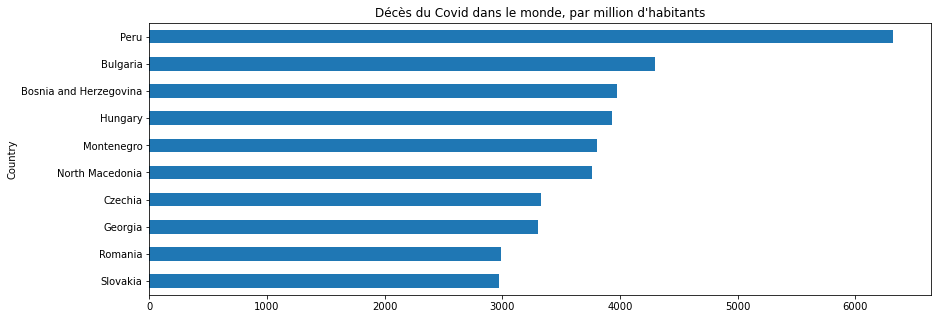

In [24]:
# Grouper par pays, rétablir la colonne pays (qui était devenue index), trier
dfGr=df.groupby(['Country']).sum().reset_index()
dfGr.sort_values(by='Décès/ million hab', ascending=False, inplace= True)

# Représenter les 10 pays les plus endeuillés
dfGr[:10].plot.barh('Country','Décès/ million hab',figsize=(14, 5),legend=None).invert_yaxis() #sinon, c'est ascendant
plt.title("Décès du Covid dans le monde, par million d'habitants")

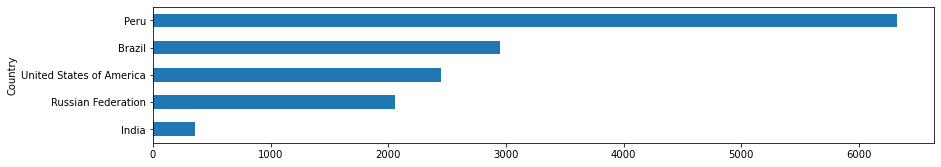

In [25]:
# Restreignons à ces pays
ListHead = ['Peru','India','Brazil','Russian Federation', 'United States of America']
#Ajoutons une colonne 'rang' au df
dfGr['Rank'] = dfGr['Décès/ million hab'].rank(ascending=0)

Head = dfGr.loc[dfGr['Country'].isin(ListHead)]

Head.plot.barh('Country','Décès/ million hab',figsize=(14, 2.5),legend=None).invert_yaxis()

In [26]:
# Quel est leur rang si on considère le taux de mortalité ? 
Head

,Country,New_deaths,Population (en 000 pers),Décès/ million hab,Rank
163,Peru,202295,2.303227e+07,6323.841189,1.0
28,Brazil,617873,1.508179e+08,2949.706387,12.0
226,United States of America,799942,2.355093e+08,2445.585858,21.0
173,Russian Federation,300269,1.049285e+08,2060.390312,34.0
96,India,478325,9.739024e+08,353.622689,126.0


# Visualisation restreinte à l'OCDE

In [27]:
# Retreindre à l'OCDE, grouper à nouveau
dfOCDE= df.loc[df['OCDE']=='OCDE']
dfOGr=dfOCDE.groupby(['Country']).sum().reset_index()
dfOGr.sort_values(by='Décès/ million hab', ascending=False, inplace= True)

Text(0.5, 1.0, "Décès du Covid dans l'OCDE sur toute la pandémie, par million d'habitants")

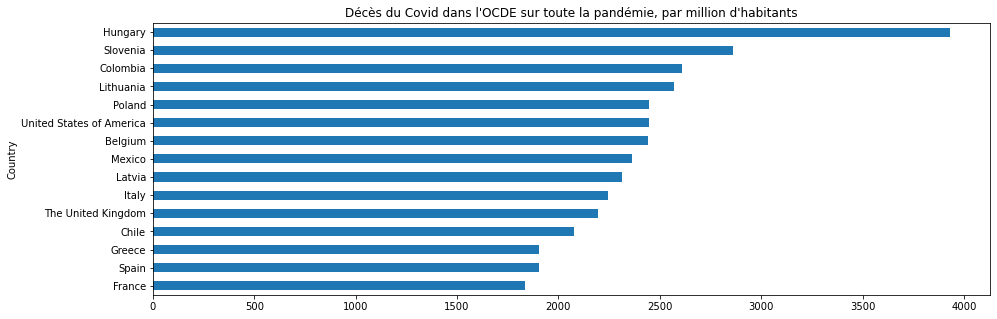

In [28]:
dfOGr[:15].plot.barh('Country','Décès/ million hab',figsize=(15, 5),legend=None).invert_yaxis()
plt.title("Décès du Covid dans l'OCDE sur toute la pandémie, par million d'habitants")

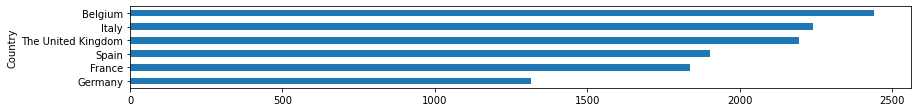

In [29]:
# Bonus: classement de la France et de ses voisins
FG = ['France', 'Germany', 'The United Kingdom', 'Belgium', 'Italy', 'Spain']

dfFG = dfOGr.loc[dfOGr['Country'].isin(FG)]

dfFG.plot.barh('Country','Décès/ million hab',figsize=(14, 1.5),legend=None).invert_yaxis()